# Final Project Report

# Introduction (several paragraphs)
explains data (source, variables, collection method etc), goal, and motivation for goal

Climate change is a phrase we here often in our lives nowadays, and we are often left wondering about the causes and how we can affect change. For our project, we decided to take a look at local climate trends over the last 50 years and what might be affecting them. More specifically, we have decided to analyze the level of annual CO2 emissions in DC since 1970 and compare this to the annual average temperature of DC over the same period of time.

In order to complete our analysis, we would need to collect data about DC temperature and emissions trend over the past 50 years. Fortunately, this variety of data is readily available directly from government managed sources. Our emissions data was collected from the US Energy Information Administration (EIA) and included the CO2 emissions in million metric tons by state from 1970 to 2020. This dataset used states for index and years for columns, so data cleaning was necessary which we will detail in the following section.

The next data we needed to seek was historical temperature data for DC. This data was accessible from NOAA. The data set included DC's monthly, annual, and seasonal average temperature ranging from 1871 to March of 2023. It should be noted that this data was accessed in the form of a pdf, so online software was needed to convert the pdf dataset into a csv. Since the dataset is small enough to read over manually, we were able to ensure that no data was lost in this process.

Our goal is to determine whether historical emissions may have had an impact on temperature trends in DC over the past 50 years. We will create a visualization to see the trends, as well as perform a regression analysis to see if there are any significant findings.

# Method (length depends on project)
explains in detail the cleaning, preprocessing steps, and analytic steps you took. Should be detailed enough someone else could replicate your work.

The emissions data set was originally downloaded as an excel file, which allowed us to do preprocessing in excel without having to manually drop columns or rows with pandas. The first step was to take only the data for DC since the data set included emissions data for every state. To do this we copied only column names and the row of data for DC, then pasted it into a new excel sheet. We saved this as a csv titled 'DCemissions.csv' that we could import into our notebook workspace. Once we read the csv file into our workspace, there were a couple columns at the end that were not relevant to our intended use, so we dropped them from the dataframe and were ready to move on to the temperature data.

The dataset containing DC's historic temperature trends required a few more processing steps than the emissions data. Initially, the dataset was in pdf format, seemingly serving only the purpose of allowing the public to view the historic data. To get the data into a workable format, we used a free pdf to excel converter to put the data into excel and prepare it for further cleaning. Within excel there were a few changes we made before downloading the data to a csv. First, the pdf version of the data repeated the column headers on each page, so we had to remove all of the repeated headers. There were also some rows which were completely empty, so we went through and cut each of these rows from the data set. Finally, the temperature data ranged from 1871 to the most recent month of 2023, while the emissions data only spanned from 1970 to 2020, so we shortened the temperature data to the same range. We then converted the excel file to a csv titled "DCtemps.csv" and imported it into the workspace. 

For our main analysis, we wanted to compare DC's annual temperature with its annual emissions over the selected date range Unfortunately, one of our datasets was in a wide format and one was in a long format. Luckily, we now know how to handle this issue and it wasn't too big of an issue. We wanted the final dataset to be in long format, so we needed to adjust the emissions dataframe. Since the emissions dataframe had each year's emissions as its own column, we decided to melt the dataframe so that there was a column for year and a column for emissions. We then dropped the column which repeated "Disctrict of Columbia" for each row. Next, we moved over to the termperature dataset and dropped all columns except for year and annual temperature.

Now, we were ready to combine the two dataframes. We decided to do this using the concat function, then we dropped the extra "year" column that came as a result of the process. Finally, we made "Year" the index of the dataframe for visualization purposes. 

The final step was to create our visualization for our analysis. At first, we decided to plot a multi-bar plot. The plot shows each year's temperature and emissions. The problem with this plot is that the two attributes of interest do not share the same unit of measure on the y-axis, making the graph difficult to read. Our solution for this issue was to create a double-axis line chart. Not only would a line chart be more suitable for analyzing change over time, but it would also allow us to see both attributes on a similar scale so that we could more easily compare their changes.

# Preprocessing (length depends on project)
cleans and manipulates data into the right format for analysis

In [1]:
import pandas as pd
import statistics as stat
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read DC Emissions data from csv file
DCemissions = pd.read_csv('data/DCemissions.csv')
DCemissions.head()

,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,Percent,Absolute,Percent.1,Absolute.1
0,District of Columbia,13.6,11.9,11.3,11.9,9.8,7.9,7.7,7.9,7.5,...,3.0,2.8,2.6,2.9,2.8,2.4,-82.4%,-11.2,-14.5%,-0.4


In [3]:
# Read DC Temperature data from csv file
DCtemps = pd.read_csv('data/DCtemps.csv')
DCtemps.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,...,NOV,DEC,ANN,WINTER,SPRING,SUMMER,AUTUMN,1ST HALF,2ND HALF,Unnamed: 20
0,1970,30.0,37.1,41.9,55.3,68.3,75.2,79.2,79.0,75.0,...,49.3,39.7,57.7,34.5,55.2,77.8,62.3,51.3,64.1,NaN
1,1971,31.3,39.1,43.2,55.0,63.7,75.9,78.3,76.7,73.0,...,48.2,45.5,57.9,36.7,54.0,77.0,62.0,51.4,64.4,NaN
2,1972,38.5,36.5,45.6,54.1,64.6,70.2,77.5,75.9,71.0,...,46.8,43.6,56.7,40.2,54.8,74.5,57.9,51.6,61.8,NaN
3,1973,37.6,37.0,51.1,56.0,62.8,77.1,79.2,79.9,74.3,...,51.6,41.9,59.3,39.4,56.6,78.7,63.1,53.6,65.0,NaN
4,1974,42.9,39.2,49.2,58.3,65.1,71.5,79.0,78.4,70.2,...,50.9,43.1,58.8,41.3,57.5,76.3,59.5,54.4,63.2,NaN


In [4]:
# Extract the 'YEAR' and 'ANN' columns from DCtemps
DCtempsdf = DCtemps[['YEAR', 'ANN']]
DCtempsdf.head()

,YEAR,ANN
0,1970,57.7
1,1971,57.9
2,1972,56.7
3,1973,59.3
4,1974,58.8


In [5]:
# Drop columns that don't include information about the yearly emissions
DCemissions.drop(columns=['Percent', 'Absolute', 'Percent.1', 'Absolute.1'], inplace=True)

# Unpivot the DCemissions dataframe from a wide format to a long format
DCemissionsdf = DCemissions.melt(id_vars='State', var_name='Year', value_name='CO2EMISSIONS')

# Drop the 'State' column from DCemissionsdf
DCemissionsdf.drop(columns=['State'], inplace=True)

DCemissionsdf.head()

,Year,CO2EMISSIONS
0,1970,13.6
1,1971,11.9
2,1972,11.3
3,1973,11.9
4,1974,9.8


In [6]:
# Merge the DCtempsdf and DCemissionsdf dataframes
merged = pd.concat([DCtempsdf, DCemissionsdf], axis=1)

# Drop the 'Year' column from DCemissionsdf
merged.drop(columns=['Year'], inplace=True)

merged.head()

,YEAR,ANN,CO2EMISSIONS
0,1970,57.7,13.6
1,1971,57.9,11.9
2,1972,56.7,11.3
3,1973,59.3,11.9
4,1974,58.8,9.8


In [7]:
# Set the index of the merged dataframe to the 'YEAR' column
merged.set_index(merged['YEAR'], inplace=True)

# Drop the 'YEAR' column from the merged dataframe
merged.drop(columns=['YEAR'], inplace=True)

# Rename the columns of the merged dataframe
merged.rename(columns={'ANN': 'Annual_Temp_Fahrenheit', 'CO2EMISSIONS': 'CO2_Emissions_Tons'}, inplace=True)

merged.head()

,Annual_Temp_Fahrenheit,CO2_Emissions_Tons
YEAR,,
1970,57.7,13.6
1971,57.9,11.9
1972,56.7,11.3
1973,59.3,11.9
1974,58.8,9.8


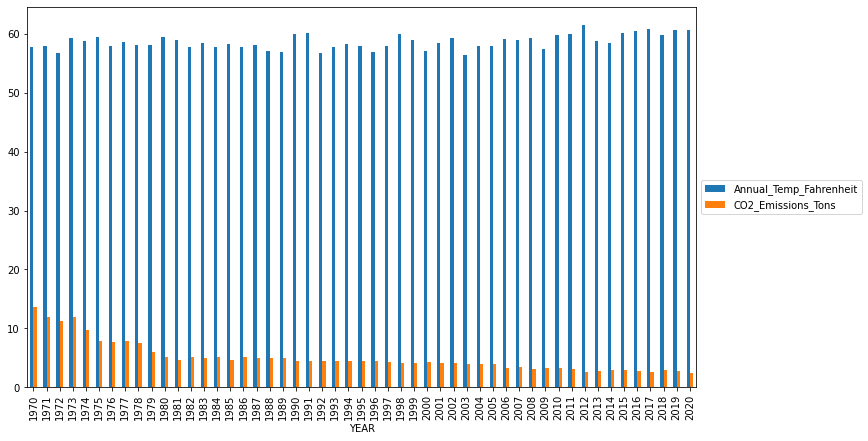

In [8]:
ax = merged.plot.bar(stacked=False, figsize=(12, 7))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Results

Summarizes and visualizes the data as appropriate to address your goal. May be broken down into subsections if that makes sense.

The visualization below shows the trends in Annual Temperature and CO<sub>2</sub> from 1970 to 2020. 

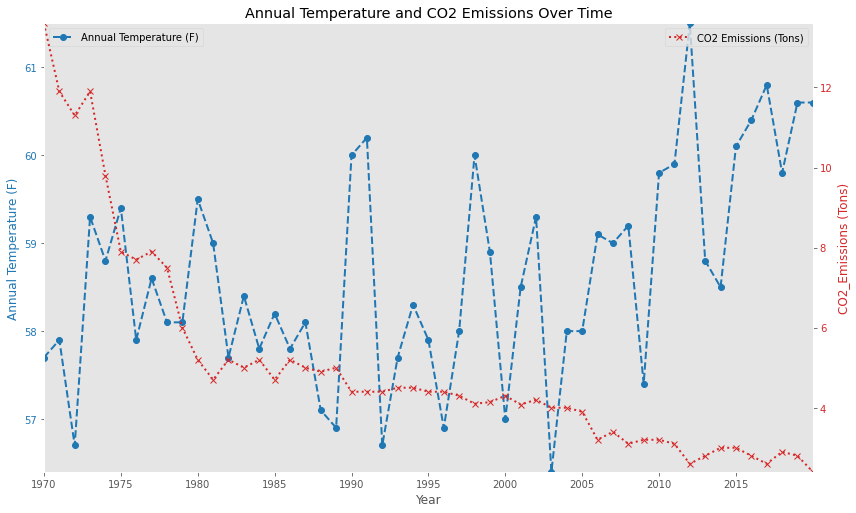

In [17]:
# Rename merged data frame to df
df = merged

# Use a predefined style for better aesthetics
plt.style.use('ggplot')

# Create a new figure and a subplot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Set the x-axis label
ax1.set_xlabel('Year')

# Set the y-axis label for the first plot (Annual Temperature)
ax1.set_ylabel('Annual Temperature (F)', color='tab:blue')

# Create the first line plot for Annual Temperature
ax1.plot(df.index, df['Annual_Temp_Fahrenheit'], color='tab:blue', linestyle='--', linewidth=2, marker='o')

# Set the y-axis tick label color for the first plot
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Set the limits for the x-axis and the first y-axis
ax1.set_xlim(df.index.min(), df.index.max())
ax1.set_ylim(df['Annual_Temp_Fahrenheit'].min(), df['Annual_Temp_Fahrenheit'].max())

# Add a legend for the first plot
ax1.legend(['Annual Temperature (F)'], loc='upper left')

# Remove gridlines to the first plot
ax1.grid(False)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Set the y-axis label for the second plot (CO2 Emissions)
ax2.set_ylabel('CO2_Emissions (Tons)', color='tab:red')

# Create the second line plot for CO2 Emissions
ax2.plot(df.index, df['CO2_Emissions_Tons'], color='tab:red', linestyle=':', linewidth=2, marker='x')

# Set the y-axis tick label color for the second plot
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set the limits for the second y-axis
ax2.set_ylim(df['CO2_Emissions_Tons'].min(), df['CO2_Emissions_Tons'].max())

# Add a legend for the second plot
ax2.legend(['CO2 Emissions (Tons)'], loc='upper right')

# Remove gridlines again
ax2.grid(False)

# Set the frequency of ticks on the x-axis
ticks_frequency = 5
xticks = np.arange(df.index.min(), df.index.max(), ticks_frequency)
ax1.set_xticks(xticks)

# Adjust the layout for better presentation
fig.tight_layout()

# Set the title for the plot
plt.title('Annual Temperature and CO2 Emissions Over Time')

# Display the plot
plt.show()


### Annual Temperature 
The annual temperature in DC shows a general upward trend over the past 50 years. This suggests that the average temperature in the region has been increasing, which could be a result of various factors, including global climate change.

### CO2 Emissions 
The CO2 emissions in DC have been decreasing over the years. This is a positive sign, as it shows that efforts have been made to reduce carbon emissions in the area. It's important to consider that various factors could contribute to this decrease, such as the implementation of climate policies, advancements in cleaner technologies, and increased awareness of the environmental impacts of CO2 emissions.

### Overall
While the data shows an overall increase in annual temperature and a decrease in CO2 emissions, it doesn't necessarily imply a direct causal relationship between the reduction in CO2 emissions and the increasing temperature trend. Climate change is a complex phenomenon influenced by numerous factors, and the relationship between local CO2 emissions and temperature trends may not be straightforward. The line plot of the provided data highlights the trends in annual temperature and CO2 emissions in DC over the past 50 years, with the increasing temperature trend aligning with broader concerns of climate change and the decrease in CO2 emissions indicating efforts to mitigate its impacts.

# Discussion (several paragraphs)
What are the implications of your findings with respect to your goal

The objective of this project was to investigate the potential relationship between carbon dioxide emissions and temperature in the Washington DC area. The purpose of this investigation was to recommend further action based on the findings. Although our analysis did not uncover a direct correlation between these variables, it did reveal that the temperature has exhibited significant fluctuations over the past 50 years with an overall increase.

According to climate.gov, carbon dioxide is considered the most critical greenhouse gas as it is responsible for absorbing heat and radiating it back to the Earth's surface. Our initial assumption was that reducing carbon dioxide emissions would lead to a corresponding reduction in temperature. However, our findings indicate that despite a steady decrease in carbon dioxide emissions, the temperature in the DC area has continued to rise over the past 50 years. The United States Environmental Protection Agency (EPA) reported that in 2021 alone, the U.S. emitted 6,340.2 million metric tons of carbon dioxide equivalents, and the DC area has experienced a decrease in emissions while emissions across the U.S. have remained steady at around 6000 million metric tons per year for the last three decades.

Our analysis highlights that mitigation efforts in a single city or state are insufficient to reduce the impact of carbon emissions on climate change. Therefore, it is crucial for policymakers across different industries and the government to implement necessary strategies that will result in a decline in carbon emissions. The transportation sector is one of the significant contributors to greenhouse emissions, accounting for over 30% of all emissions since 1970, according to the EPA. One potential solution to reducing emissions nationwide would be for the U.S. government to enforce stricter restrictions on vehicle manufacturers and enact harsher fines for those that are non-compliant. This is just one of the many strategies that could be implemented to reduce emissions and limit their impact on the environment.

# Limitations (couple paragraphs)
What are the limitations of the data set and your analyses

One limitation of our dataset was the attribute we looked at, which was CO2 emissions. We found that there wasn’t much of a link between temperature and CO2 emissions in DC, so we’d ideally want to have more data to look at other attributes that could be more closely linked to temperature rises and falls. 

Another limitation of our dataset was that we only had temperature data for DC. We could get a more complete picture of how temperature and CO2 emissions are related if we looked at more states, which we’d need data for.

# Conclusion (couple paragraphs)
What is the final take away from your work

From our goal to determine whether historical emissions may have had an impact on temperature trends in DC over the past 50 years we were proved unsucessful to deduce said information. Throughout this process of cleaning our data, interpreting, making visualizations and coming to our conclusion we learned that DC has been trying to become more carbon footprint friendly city. We have also deduced that the flucuations of temperature cannot be related cities overall carbon impact.Temperatures are flucating more and one city is not enough to change this problem it will take policymakers and other government sanction actions to make this a reality. 

In [13]:
DCemissionsdf.sum()

Year            1970197119721973197419751976197719781979198019...
CO2EMISSIONS                                               257.72
dtype: object